In [84]:
# Import Libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import nltk
import random
import re
import tensorflow as tf
import keras
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [85]:
# Load dataset from Kaggle (https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews/data)
Data = pd.read_csv(r"C:\Users\Dhyan\Downloads\archive\Restaurant_Reviews.tsv", sep='\t') # Separator
Data.head() # Prints the first few rows of the dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [86]:
# Prints the count of each unique value in the 'Liked' column.
Data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [87]:
Data = Data[['Review', 'Liked']]         # Keeps only the 'Review' and 'Liked' columns in the DataFrame.
print(Data)                              # Prints the DataFrame containing 'Review' and 'Liked'.
print(Data.shape)                        # Prints the shape (number of rows and columns) of the DataFrame.
print(Data.isnull().sum())               # Prints the sum of null values in each column.

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]
(1000, 2)
Review    0
Liked     0
dtype: int64


In [113]:
top_reviews_list = Data['Review'].head(5).tolist()

# Displaying the top 5 reviews in the desired list format
print(top_reviews_list)

['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.']


In [88]:
Data.describe()                          # Generates descriptive statistics of the DataFrame.

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [89]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = Data[Data['Liked'] == 1]['Review'].values
negative_reviews = Data[Data['Liked'] == 0]['Review'].values

# Combine the positive and negative reviews as single strings
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

In [90]:
# Create word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

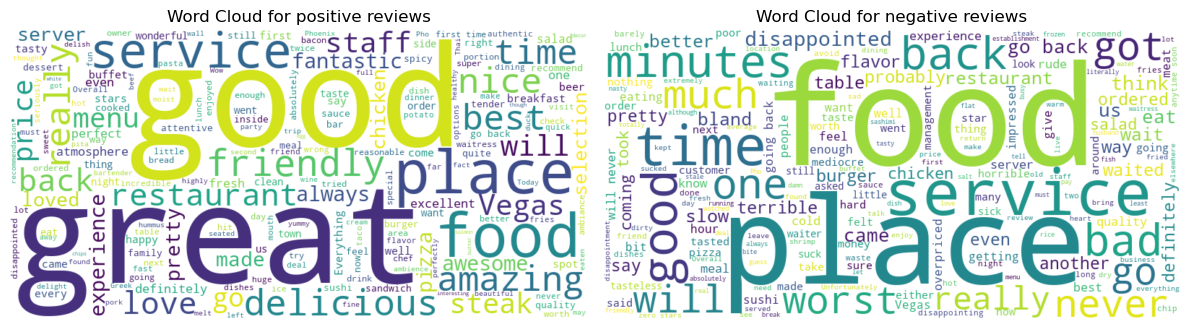

In [91]:
# Plot the word clouds side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for positive reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for negative reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

In [92]:
import nltk                # Imports NLTK.
nltk.download('stopwords') # Downloads the NLTK stopwords dataset.
nltk.download('wordnet')   # Downloads the NLTK wordNet dataset.
nltk.download('punkt')     # Downloads the NLTK punkt dataset.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhyan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
from nltk import WordNetLemmatizer  # Imports the WordNetLemmatizer from NLTK.
lemmatizer = WordNetLemmatizer()    # Creates an instance of the WordNetLemmatizer.

In [94]:
# Data cleaning
def clean_data(text):
    # Removing non-alphabetic characters using regular expressions
    review = re.sub('[^a-zA-Z]', ' ', text)
    
    # Remove URLs
    review = re.sub(r'http\S+|www.\S+', '', review)
    
    # Remove punctuations
    review = re.sub(r'[^\w\s]', '', review)
    
    # Remove numbers
    review = re.sub(r'\d+', '', review)
    
    # Remove extra white spaces
    review = re.sub(r'\s+', ' ', review).strip()
    
    # Remove @ mentions
    review = re.sub(r'@\w+', '', review)
    
    # Remove hashtags
    review = re.sub(r'#[A-Za-z0-9]+', '', review)

    # Converting the text to lowercase
    review = review.lower()

    # Splitting the text into a list of words
    review = review.split()

    # Creating a PorterStemmer instance
    ps = PorterStemmer()

    # Applying stemming and removing stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # Applying lemmatization
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # Joining the list of words back into a string
    review = ' '.join(review)

    return review

In [95]:
# Creating an empty list to store cleaned reviews
cleaned_corpus = []

# Applying the data cleaning function to each review and appending to the corpus
for i in range(len(Data)):
    cleaned_review = clean_data(Data['Review'][i])
    cleaned_corpus.append(cleaned_review)

# Check the first 5 elements of the cleaned corpus
print(cleaned_corpus[0:5])

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


In [96]:
from nltk.tokenize import word_tokenize

# Creating an empty list to store tokenized reviews
tokenized_corpus = []

# Applying word_tokenize to each cleaned review and appending to the tokenized corpus
for cleaned_review in cleaned_corpus:
    tokenized_review = word_tokenize(cleaned_review)
    tokenized_corpus.append(tokenized_review)

# Check the first 5 elements of the tokenized corpus
print(tokenized_corpus[0:5])

[['wow', 'love', 'place'], ['crust', 'good'], ['tasti', 'textur', 'nasti'], ['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love'], ['select', 'menu', 'great', 'price']]


In [97]:
# Tokenization and further preprocessing
max_features = 300
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(tokenized_corpus)
X = tokenizer.texts_to_sequences(tokenized_corpus)
X = pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,  11,   2],
       [  0,   0,   0, ...,   0,   0,   3],
       [  0,   0,   0, ...,   0,   0,  85],
       ...,
       [  0,   0,   0, ...,  14,   6,   7],
       [  0,   0,   0, ...,  74,  90,   8],
       [  0,   0,   0, ..., 142, 211, 106]])

In [98]:
oov_tok = '<oov>'           # Defines the out-of-vocabulary token.
embedding_dims = 16         # Sets the number of dimensions for word embeddings.
padding_type = 'post'       # Sets the type of padding.
vocab_size = 1000           # Sets the size of the vocabulary.
max_length = 20             # Sets the maximum length of sequences.
trunc_type = 'post'         # Defines the type of truncation for sequences.

In [99]:
onehot_representation = [one_hot(" ".join(sent), vocab_size) for sent in tokenized_corpus]
onehot_representation[:10]   

[[248, 546, 478],
 [210, 239],
 [50, 562, 901],
 [615, 138, 83, 41, 269, 706, 97, 227, 546],
 [352, 800, 194, 980],
 [795, 882, 950, 433, 622],
 [507, 976, 377],
 [570, 791, 783, 316, 244, 959, 405, 569, 827, 752],
 [471, 194],
 [194, 258]]

In [100]:
padded_sequences = pad_sequences(onehot_representation, padding = padding_type, maxlen = max_length) # Pads the one-hot representations to ensure all sequences have the same length.
padded_sequences[:10]                                                                                # Prints the first 10 elements of the padded sequences.

array([[248, 546, 478,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [210, 239,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 50, 562, 901,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [615, 138,  83,  41, 269, 706,  97, 227, 546,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [352, 800, 194, 980,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [795, 882, 950, 433, 622,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [507, 976, 377,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [570, 791, 783, 316, 244, 959, 405, 569, 827, 752,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [471, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokenized corpus to text documents
text_documents = [' '.join(tokens) for tokens in tokenized_corpus]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer(ngram_range =(1,1), max_features = 2000)

# Fit and transform the corpus into a bag-of-words representation
X = vectorizer.fit_transform(text_documents)

# Convert the sparse matrix to a dense array
dense_array = X.toarray()

print(dense_array)
print(dense_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1000, 1564)


In [102]:
from sklearn.model_selection import StratifiedShuffleSplit
# Assigning Variables
x = dense_array
y = Data['Liked']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

print("Dimensions of x_train:", x_train.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of x_test:", x_test.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of x_train: (800, 1564)
Dimensions of y_train: (800,)
Dimensions of x_test: (200, 1564)
Dimensions of y_test: (200,)


In [103]:
import numpy as np
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.class_probabilities = None
        self.feature_log_probabilities = defaultdict(lambda: defaultdict(float))

    def _laplace_smoothing(self, count, class_word_count, total_words):
        return np.log((count + self.alpha) / (class_word_count + total_words * self.alpha))

    def _calculate_class_probabilities(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        return dict(zip(unique_classes, np.log(class_counts / total_samples)))

    def _calculate_feature_probabilities(self, X, y):
        total_words = len(set(X.flatten()))

        for cls in set(y):
            cls_indices = np.where(y == cls)[0]
            class_word_count = 0

            for idx in cls_indices:
                for word in X[idx]:
                    self.feature_log_probabilities[cls][word] += 1
                    class_word_count += 1

            for word in set(X.flatten()):
                self.feature_log_probabilities[cls][word] = self._laplace_smoothing(
                    self.feature_log_probabilities[cls][word],
                    class_word_count,
                    total_words
                )

    def train(self, X, y):
        self.class_probabilities = self._calculate_class_probabilities(y)
        self._calculate_feature_probabilities(X, y)

    def predict(self, X):
        predictions = []

        for sample in X:
            max_class = None
            max_log_prob = float('-inf')

            for cls, class_log_prob in self.class_probabilities.items():
                log_prob = class_log_prob

                for word in sample:
                    if word in self.feature_log_probabilities[cls]:
                        log_prob += self.feature_log_probabilities[cls][word]

                if log_prob > max_log_prob:
                    max_log_prob = log_prob
                    max_class = cls

            predictions.append(max_class)

        return np.array(predictions)

In [104]:
# Train Naive Bayes Classifier
NavieBayes_model = NaiveBayesClassifier(alpha=1.0)
NavieBayes_model.train(x_train, y_train)

In [105]:
# Model evaluation
from sklearn.metrics import accuracy_score
# Making prediction on train set
prediction_on_training_data = NavieBayes_model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
# Making prediction on test set
prediction_on_test_data = NavieBayes_model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 50.74999999999999 %
Accuracy on test data: 56.00000000000001 %


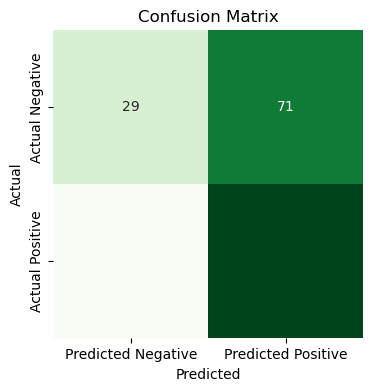

Confusion Matrix:
 [[29 71]
 [17 83]]

True Positives(TP) =  83

False Negatives(FN) =  17

False Positives(FP) =  71

True Negatives(TN) =  29


In [117]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", conf_matrix)
print('\nTrue Positives(TP) = ', conf_matrix[1,1])

print('\nFalse Negatives(FN) = ', conf_matrix[1,0])

print('\nFalse Positives(FP) = ', conf_matrix[0,1])

print('\nTrue Negatives(TN) = ', conf_matrix[0,0])

In [107]:
from sklearn.metrics import classification_report
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Negative', 'Positive'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.29      0.40       100
    Positive       0.54      0.83      0.65       100

    accuracy                           0.56       200
   macro avg       0.58      0.56      0.53       200
weighted avg       0.58      0.56      0.53       200



In [108]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.56
Precision :  0.538961038961039
Recall :  0.83
Specificity :  0.29


In [109]:
# Load the Excel file with unseen reviews
unseen_data = pd.read_csv(r"C:\Users\Dhyan\Documents\Sentiment Analysis of Customer Review\Restaurant Reviews.csv")

# Assuming the TSV file has a column named 'Review'
unseen_reviews = unseen_data['Review'] 

In [110]:
# Clean the unseen reviews
cleaned_unseen_reviews = [clean_data(review) for review in unseen_reviews]

# Convert the processed unseen reviews to a bag-of-words representation
unseen_reviews_bow = vectorizer.transform(cleaned_unseen_reviews).toarray()

# Make predictions on unseen reviews
predictions_on_unseen_data = NavieBayes_model.predict(unseen_reviews_bow)

# Display the predictions
for i in range(len(unseen_reviews)):
    print(f"Review {i + 1}: {unseen_reviews[i]}\nPrediction: {'Positive' if predictions_on_unseen_data[i] == 1 else 'Negative'}\n{'-'*30}")

Review 1: The food was amazing, and the service was excellent!
Prediction: Positive
------------------------------
Review 2: Terrible experience.
Prediction: Positive
------------------------------
Review 3: I would definitely recommend this place.
Prediction: Positive
------------------------------
Review 4: Exceptional dining experience with impeccable service, delightful ambiance, and a menu that tantalizes the taste buds with creative and well-executed dishes.
Prediction: Negative
------------------------------
Review 5: Great ambiance and delicious food.
Prediction: Positive
------------------------------
Review 6: Five-star quality from start to finish the diverse menu, expertly crafted cocktails, and attentive staff create an unforgettable evening of gastronomic pleasure.
Prediction: Negative
------------------------------
Review 7: Outstanding! The chef's dedication to using fresh, locally sourced ingredients shines through in every dish, resulting in a truly authentic and dele